In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
file_path = "EndowmentData19to25.csv"
df = pd.read_csv(file_path)

In [63]:
df.head()

,Buyer,Seller,price,Year
0,1,0,4.05,2019
1,1,0,15.00,2019
2,1,0,8.00,2019
3,1,0,30.00,2019
4,0,1,5.00,2019


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Buyer   298 non-null    int64  
 1   Seller  298 non-null    int64  
 2   price   298 non-null    float64
 3   Year    298 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.4 KB


In [65]:
df.describe()

,Buyer,Seller,price,Year
count,298.000000,298.000000,298.000000,298.000000
mean,0.496644,0.503356,12.016577,2022.023490
std,0.500830,0.500830,9.030575,2.039043
min,0.000000,0.000000,0.000000,2019.000000
25%,0.000000,0.000000,6.000000,2020.000000
50%,0.000000,1.000000,10.000000,2022.000000
75%,1.000000,1.000000,15.000000,2024.000000
max,1.000000,1.000000,100.000000,2025.000000


In [66]:
summary_by_year = df.groupby("Year")["price"].describe()
print(summary_by_year)

      count       mean        std  min     25%   50%      75%    max
Year                                                                
2019   46.0  10.760000   7.310169  0.0  5.0000  10.0  14.9875   35.0
2020   43.0  14.092558  15.070858  0.0  6.2500  12.0  16.5000  100.0
2021   32.0  13.217500   7.585059  3.0  7.7500  12.0  16.2500   37.0
2022   48.0  10.831875   8.255090  0.5  5.0000  10.0  14.9925   50.0
2023   38.0  12.769211   7.417890  2.0  6.4975  12.0  15.7500   30.0
2024   48.0  10.565417   6.587731  0.0  5.7500  10.0  14.9925   28.0
2025   43.0  12.668372   8.020960  1.0  7.2500  10.0  17.5000   40.0


In [67]:
#Split buyers from sellers
buyers = df[df["Buyer"] == 1].copy()

print("Buyers group shape:", buyers.shape)

print("\n--- Buyers preview ---")
print(buyers.head())

# Quick summary statistics
print("\nBuyer Price Stats:")
print(buyers["price"].describe())

Buyers group shape: (148, 4)

--- Buyers preview ---
   Buyer  Seller  price  Year
0      1       0   4.05  2019
1      1       0  15.00  2019
2      1       0   8.00  2019
3      1       0  30.00  2019
5      1       0   7.00  2019

Buyer Price Stats:
count    148.000000
mean      10.889865
std        7.862199
min        0.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       50.000000
Name: price, dtype: float64


In [68]:
#Split sellers from buyers
sellers = df[df["Seller"] == 1].copy()

print("Sellers group shape:", sellers.shape)
print("\n--- Sellers preview ---")
print(sellers.head())

print("\nSeller Price Stats:")
print(sellers["price"].describe())

Sellers group shape: (150, 4)

--- Sellers preview ---
   Buyer  Seller  price  Year
4      0       1   5.00  2019
6      0       1  19.99  2019
7      0       1  20.00  2019
8      0       1   5.00  2019
9      0       1  14.00  2019

Seller Price Stats:
count    150.000000
mean      13.128267
std        9.953175
min        0.000000
25%        7.500000
50%       12.000000
75%       15.000000
max      100.000000
Name: price, dtype: float64


C:\Users\mleen\AppData\Local\Temp\ipykernel_21144\962030963.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(buyers["price"], label="Buyers", shade=True)
C:\Users\mleen\AppData\Local\Temp\ipykernel_21144\962030963.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sellers["price"], label="Sellers", shade=True)


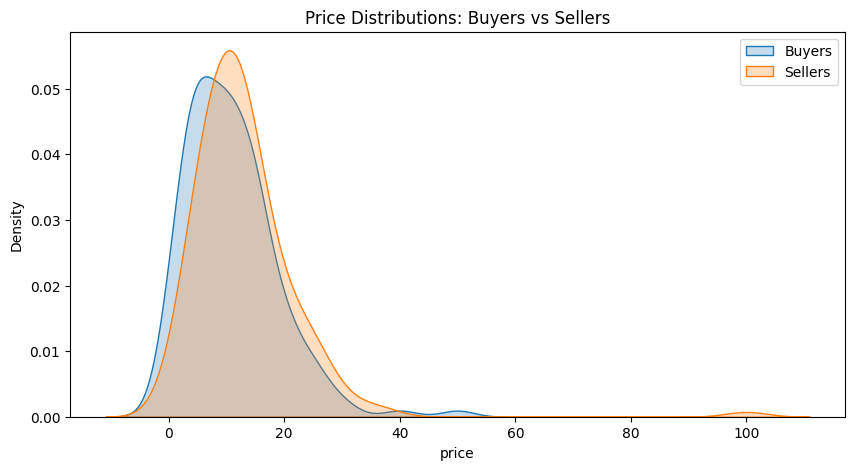

In [69]:
# Understand the shape of the data
plt.figure(figsize=(10,5))
sns.kdeplot(buyers["price"], label="Buyers", shade=True)
sns.kdeplot(sellers["price"], label="Sellers", shade=True)
plt.title("Price Distributions: Buyers vs Sellers")
plt.legend()
plt.show()

In [89]:
buyer_prices = buyers["price"]
seller_prices = sellers["price"]

buyer_mean = buyer_prices.mean()
seller_mean = seller_prices.mean()

t_stat, p_val = ttest_ind(buyer_prices, seller_prices, equal_var=False)

print("")
print(f"Mean WTP: {buyer_mean:.3f}   (n = {len(buyer_prices)})")
print(f"Mean WTA: {seller_mean:.3f}   (n = {len(seller_prices)})")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")  # usually keep p-values to 4 decimals

if p_val < 0.05:
    print("✅ The difference in average prices between Buyers and Sellers is statistically significant.")
else:
    print("❌ The difference in average prices is NOT statistically significant.")


Mean WTP: 10.890   (n = 148)
Mean WTA: 13.128   (n = 150)
T-statistic: -2.156
P-value: 0.0319
✅ The difference in average prices between Buyers and Sellers is statistically significant.


In [71]:
# T-test in every year with outliers

print("\n--- Yearly Buyer vs Seller T-tests ---")
for year, group in df.groupby("Year"):
    b_prices = group[group["Buyer"] == 1]["price"]
    s_prices = group[group["Seller"] == 1]["price"]

    if len(b_prices) > 1 and len(s_prices) > 1:  # ensure enough data
        t, p = ttest_ind(b_prices, s_prices, equal_var=False)
        result = "Significant" if p < 0.05 else "Not Significant"
        print(f"{year}: T={t:.3f}, p={p:.4f} → {result}")


--- Yearly Buyer vs Seller T-tests ---
2019: T=-0.702, p=0.4867 → Not Significant
2020: T=-1.806, p=0.0822 → Not Significant
2021: T=-0.637, p=0.5297 → Not Significant
2022: T=-0.530, p=0.5994 → Not Significant
2023: T=-0.590, p=0.5587 → Not Significant
2024: T=-2.126, p=0.0389 → Significant
2025: T=1.055, p=0.2978 → Not Significant


In [72]:
t_stat, p_val = ttest_ind(buyers["price"], sellers["price"], equal_var=False)

print("\nT-test after removing outliers")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ The difference in average prices (without outliers) is statistically significant for a = 0.05")
else:
    print("❌ The difference in average prices (without outliers) is NOT statistically significant  for a = 0.05.")


T-test after removing outliers
T-statistic: -2.1557989925758263
P-value: 0.03194365967749705
✅ The difference in average prices (without outliers) is statistically significant for a = 0.05


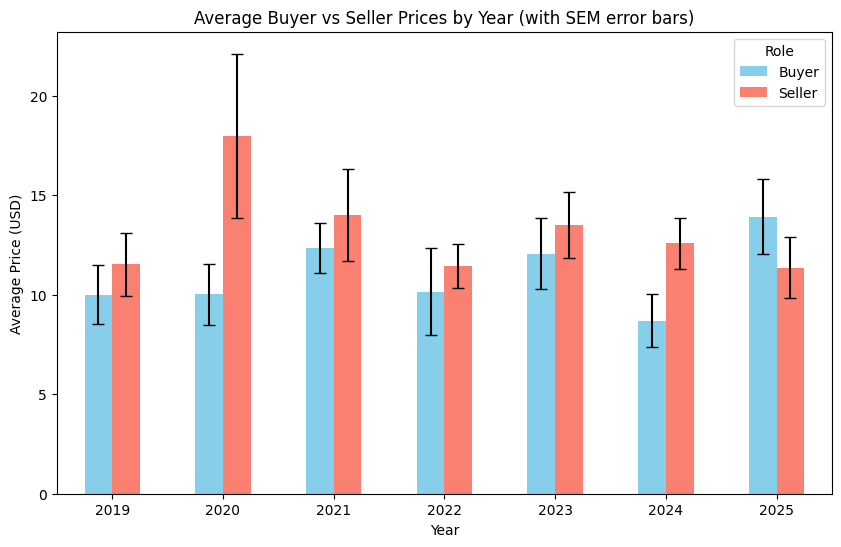

In [73]:
df_roles = pd.concat([
    buyers.assign(Role="Buyer"),
    sellers.assign(Role="Seller")
])

# Compute mean and SEM per Year & Role
summary = (
    df_roles.groupby(["Year", "Role"])["price"]
    .agg(["mean", "count", "std"])
    .reset_index()
)
summary["sem"] = summary["std"] / np.sqrt(summary["count"])

# Pivot for easier bar plotting
pivot = summary.pivot(index="Year", columns="Role", values="mean")
errors = summary.pivot(index="Year", columns="Role", values="sem")

# Plot grouped bar chart with error bars
pivot.plot(
    kind="bar",
    yerr=errors,
    figsize=(10,6),
    capsize=4,
    rot=0,
    color=["skyblue", "salmon"]
)

plt.title("Average Buyer vs Seller Prices by Year (with SEM error bars)")
plt.ylabel("Average Price (USD)")
plt.xlabel("Year")
plt.legend(title="Role")
plt.show()

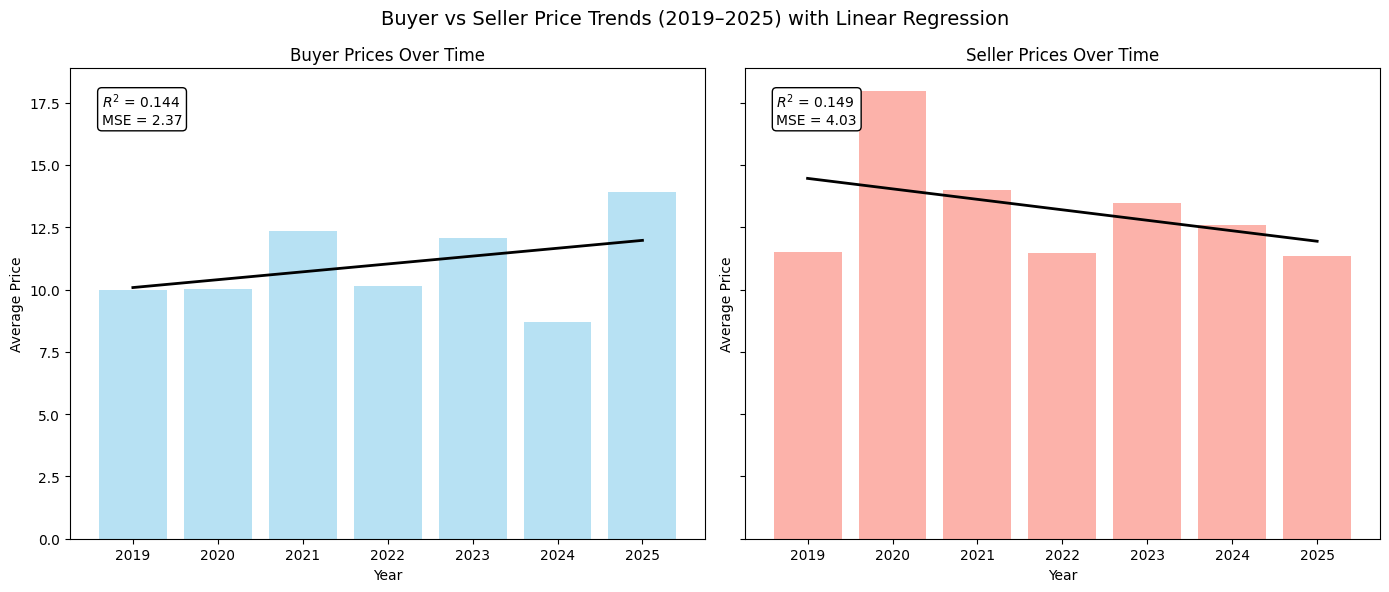

In [74]:
def regression_trend_plot_numpy(data, role, ax):
    df_role = data[data["Role"] == role]
    grouped = df_role.groupby("Year")["price"].mean().reset_index()

    X = grouped["Year"].values
    y = grouped["price"].values

    # Fit linear regression with numpy (degree=1 = straight line)
    coeffs = np.polyfit(X, y, 1)
    y_pred = np.polyval(coeffs, X)

    # Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Bar plot
    ax.bar(X, y, color="skyblue" if role=="Buyer" else "salmon", alpha=0.6)
    # Regression line
    ax.plot(X, y_pred, color="black", linewidth=2)

    ax.text(0.05, 0.95, f"$R^2$ = {r2:.3f}\nMSE = {mse:.2f}",
            transform=ax.transAxes, verticalalignment="top",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
    ax.set_title(f"{role} Prices Over Time")
    ax.set_ylabel("Average Price")
    ax.set_xlabel("Year")

# Run the plots again
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

regression_trend_plot_numpy(df_roles, "Buyer", axes[0])
regression_trend_plot_numpy(df_roles, "Seller", axes[1])

plt.suptitle("Buyer vs Seller Price Trends (2019–2025) with Linear Regression", fontsize=14)
plt.tight_layout()
plt.show()

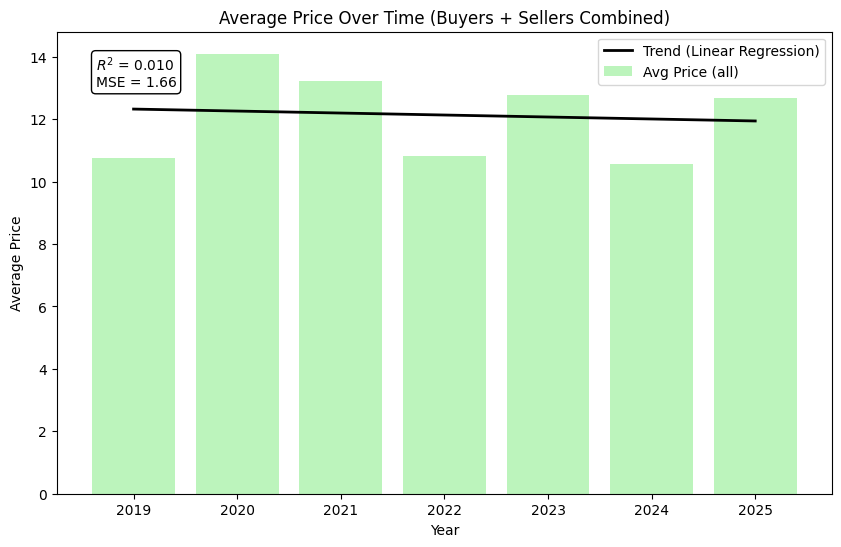

In [75]:
# Average price per year
overall = df.groupby("Year")["price"].mean().reset_index()

X = overall["Year"].values
y = overall["price"].values

# Fit linear regression using NumPy
coeffs = np.polyfit(X, y, 1)        # slope + intercept
y_pred = np.polyval(coeffs, X)

# Metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Plot histogram (bar chart of yearly means)
plt.figure(figsize=(10,6))
plt.bar(X, y, color="lightgreen", alpha=0.6, label="Avg Price (all)")

# Regression line
plt.plot(X, y_pred, color="black", linewidth=2, label="Trend (Linear Regression)")

# Annotate metrics
plt.text(0.05, 0.95, f"$R^2$ = {r2:.3f}\nMSE = {mse:.2f}",
         transform=plt.gca().transAxes, verticalalignment="top",
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

plt.title("Average Price Over Time (Buyers + Sellers Combined)")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.legend()
plt.show()

In [76]:
def greedy_match(df_year):
    buyers = sorted(df_year[df_year["Buyer"] == 1]["price"].tolist(), reverse=True)
    sellers = sorted(df_year[df_year["Seller"] == 1]["price"].tolist(), reverse=True)

    matches = []
    
    for seller in sellers:
        # Find highest buyer <= seller
        candidate = None
        for b in buyers:
            if b <= seller:
                candidate = b
                break
        if candidate is not None:
            matches.append((seller, candidate))
            buyers.remove(candidate)  # remove buyer (used once)
    
    return matches

# Run for 2025
df_2025 = df[df["Year"] == 2025]
matches_2025 = greedy_match(df_2025)

print(f"Number of matches in 2025: {len(matches_2025)}")
print("First 10 matches (Seller, Buyer):", matches_2025[:10])

Number of matches in 2025: 16
First 10 matches (Seller, Buyer): [(25.0, 25.0), (25.0, 23.0), (25.0, 22.0), (20.0, 20.0), (12.0, 11.25), (12.0, 11.0), (12.0, 10.0), (11.99, 10.0), (10.0, 10.0), (10.0, 10.0)]


   Year  Matches
0  2019       21
1  2020       21
2  2021       13
3  2022       21
4  2023       18
5  2024       23
6  2025       16


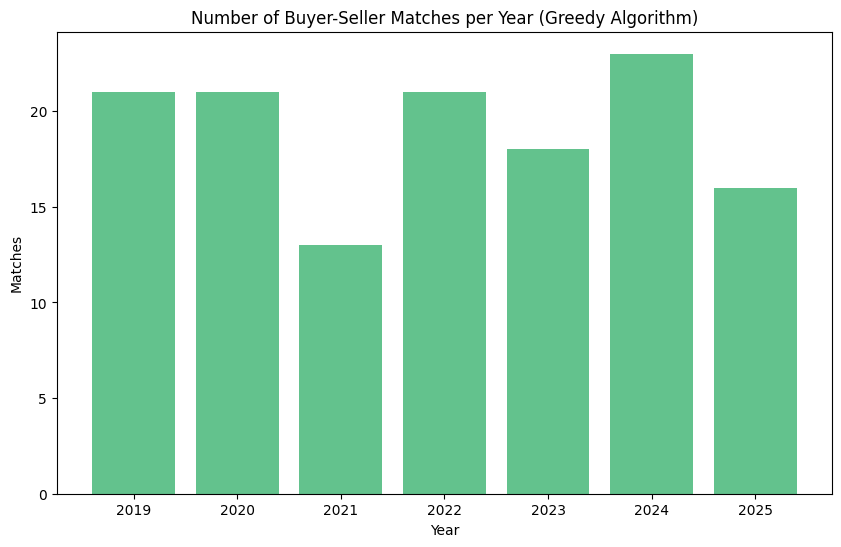

In [77]:
matches_per_year = {}

for year, df_year in df.groupby("Year"):
    matches = greedy_match(df_year)
    matches_per_year[year] = len(matches)

# Convert to DataFrame
matches_df = pd.DataFrame(list(matches_per_year.items()), columns=["Year","Matches"]).sort_values("Year")

print(matches_df)

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(matches_df["Year"], matches_df["Matches"], color="mediumseagreen", alpha=0.8)
plt.title("Number of Buyer-Seller Matches per Year (Greedy Algorithm)")
plt.xlabel("Year")
plt.ylabel("Matches")
plt.show()

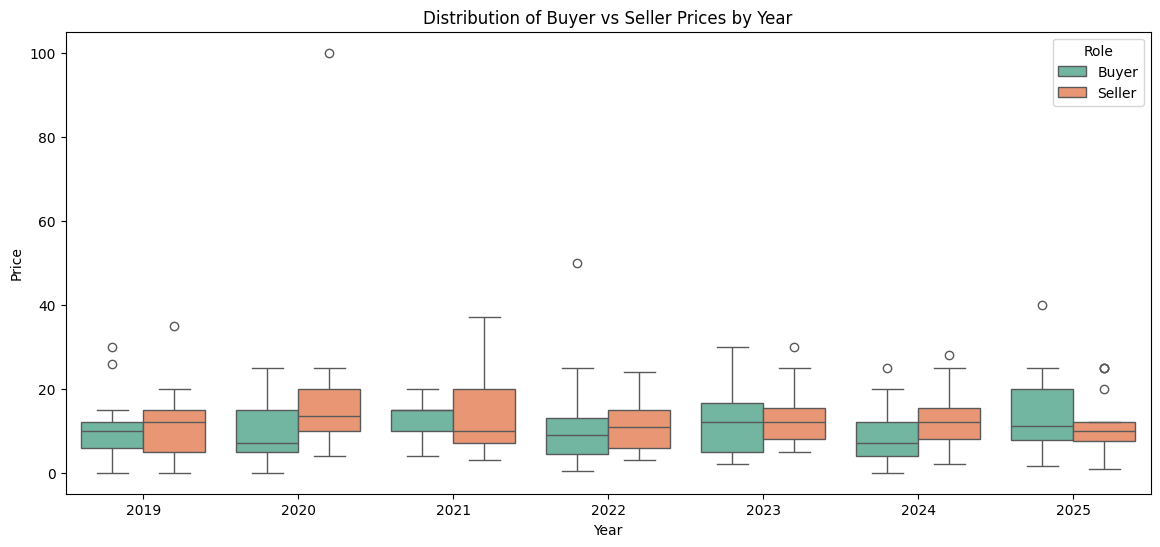

In [78]:
# Combine buyers and sellers with Role column
df_roles = pd.concat([
    buyers.assign(Role="Buyer"),
    sellers.assign(Role="Seller")
])

plt.figure(figsize=(14,6))
sns.boxplot(x="Year", y="price", hue="Role", data=df_roles, palette="Set2")

plt.title("Distribution of Buyer vs Seller Prices by Year")
plt.ylabel("Price")
plt.xlabel("Year")
plt.legend(title="Role")
plt.show()

C:\Users\mleen\AppData\Local\Temp\ipykernel_21144\99308848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Role", y="price", data=df_2025, palette="Set2")


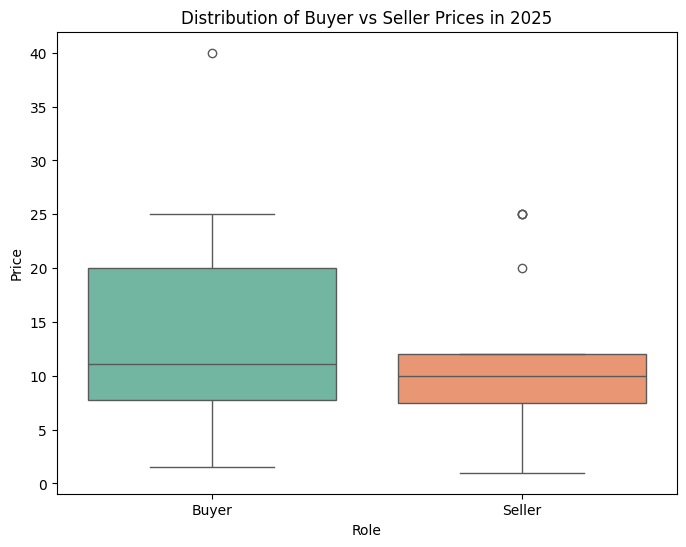

In [79]:
df_2025 = df_roles[df_roles["Year"] == 2025]

plt.figure(figsize=(8,6))
sns.boxplot(x="Role", y="price", data=df_2025, palette="Set2")

plt.title("Distribution of Buyer vs Seller Prices in 2025")
plt.ylabel("Price")
plt.xlabel("Role")
plt.show()

C:\Users\mleen\AppData\Local\Temp\ipykernel_21144\1961957749.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Role", y="price", data=df_2025, palette="Set2")


<Axes: xlabel='Role', ylabel='price'>

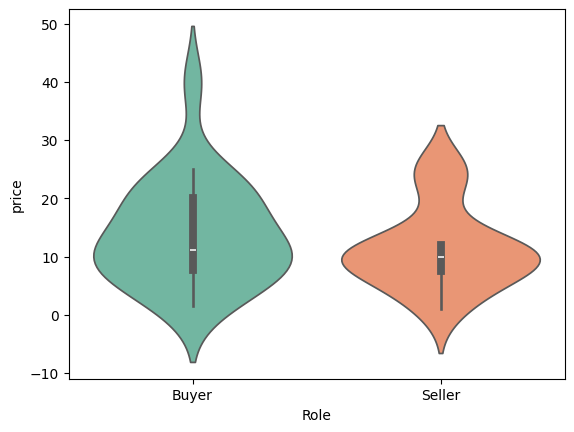

In [80]:
sns.violinplot(x="Role", y="price", data=df_2025, palette="Set2")


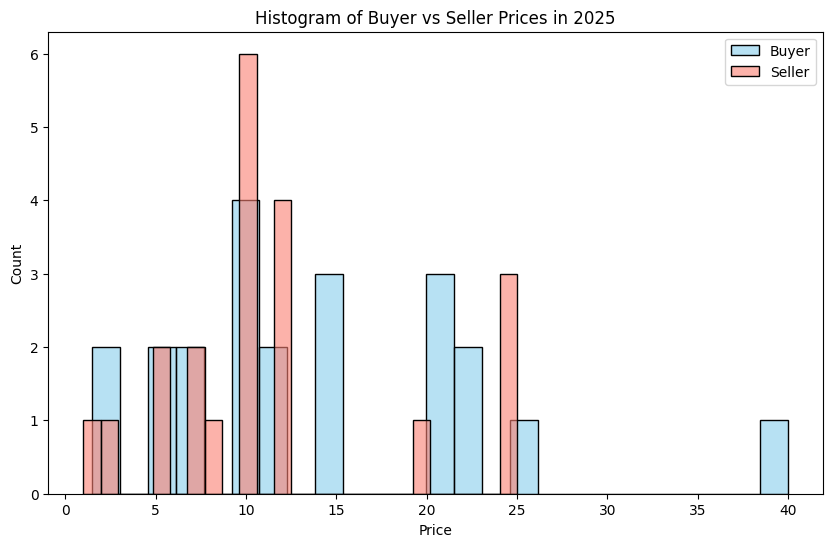

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(df_2025[df_2025["Role"]=="Buyer"]["price"], 
             bins=25, color="skyblue", label="Buyer", kde=False, alpha=0.6)
sns.histplot(df_2025[df_2025["Role"]=="Seller"]["price"], 
             bins=25, color="salmon", label="Seller", kde=False, alpha=0.6)

plt.title("Histogram of Buyer vs Seller Prices in 2025")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()

In [82]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Filter 2025
df_2025 = df[df["Year"] == 2025]

# Count separately
buyer_outliers = count_outliers(df_2025[df_2025["Buyer"] == 1]["price"])
seller_outliers = count_outliers(df_2025[df_2025["Seller"] == 1]["price"])

print(f"Number of Buyer outliers in 2025: {buyer_outliers}")
print(f"Number of Seller outliers in 2025: {seller_outliers}")

Number of Buyer outliers in 2025: 1
Number of Seller outliers in 2025: 4


      avg_buyer  avg_seller      diff
Year                                 
2019   9.999565   11.520435 -1.520870
2020  10.023333   17.976818 -7.953485
2021  12.332000   13.998824 -1.666824
2022  10.151739   11.457600 -1.305861
2023  12.052632   13.485789 -1.433158
2024   8.700000   12.593043 -3.893043
2025  13.920455   11.356667  2.563788


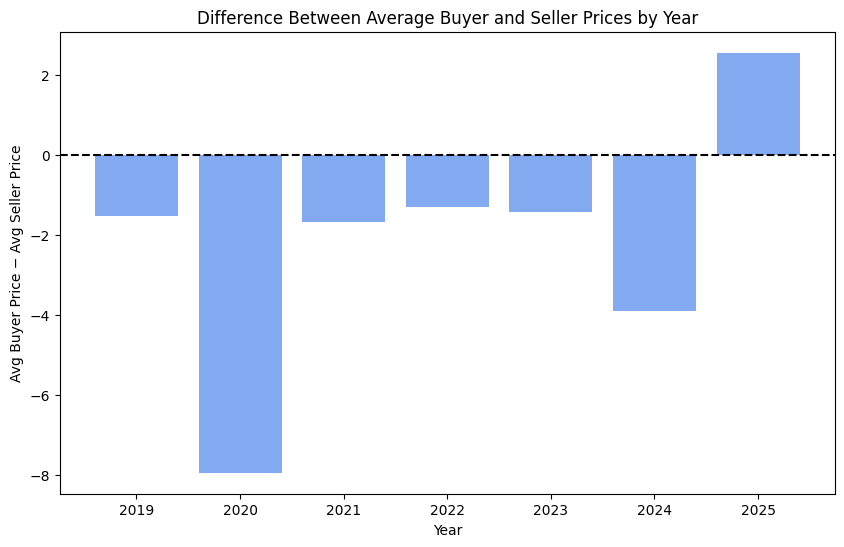

In [83]:
# Compute means
avg_prices = (
    df.groupby("Year")
    .agg(avg_buyer=("price", lambda x: x[df.loc[x.index, "Buyer"]==1].mean()),
         avg_seller=("price", lambda x: x[df.loc[x.index, "Seller"]==1].mean()))
)

# Difference
avg_prices["diff"] = avg_prices["avg_buyer"] - avg_prices["avg_seller"]

print(avg_prices)

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(avg_prices.index, avg_prices["diff"], color="cornflowerblue", alpha=0.8)
plt.axhline(0, color="black", linestyle="--")
plt.title("Difference Between Average Buyer and Seller Prices by Year")
plt.xlabel("Year")
plt.ylabel("Avg Buyer Price − Avg Seller Price")
plt.show()

   Year    MatchPct
0  2019   91.304348
1  2020   95.454545
2  2021   76.470588
3  2022   84.000000
4  2023   94.736842
5  2024  100.000000
6  2025   76.190476


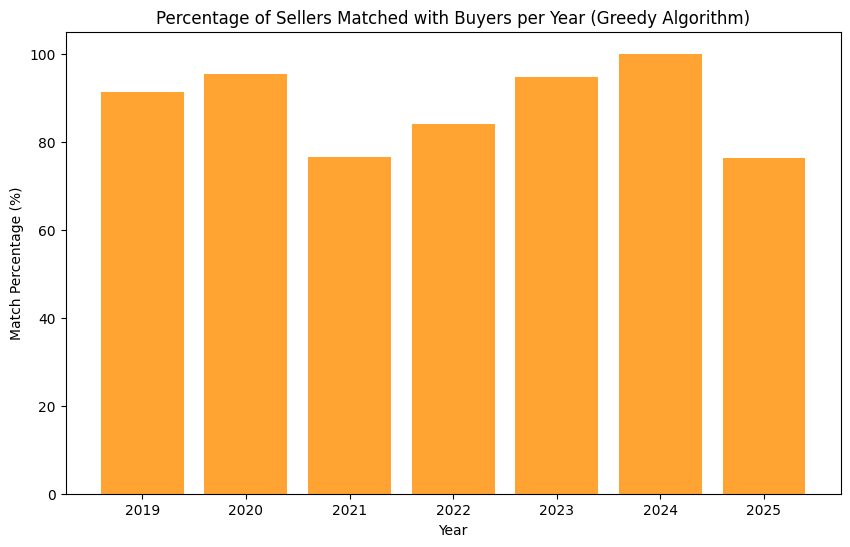

In [84]:
# ## Percentage of Buyer-Seller Matches per Year (Greedy Matching)

match_pct_per_year = {}

for year, df_year in df.groupby("Year"):
    matches = greedy_match(df_year)
    num_matches = len(matches)
    num_sellers = (df_year["Seller"] == 1).sum()
    
    match_pct = (num_matches / num_sellers * 100) if num_sellers > 0 else 0
    match_pct_per_year[year] = match_pct

# Convert to DataFrame
match_pct_df = pd.DataFrame(list(match_pct_per_year.items()), columns=["Year","MatchPct"]).sort_values("Year")

print(match_pct_df)

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(match_pct_df["Year"], match_pct_df["MatchPct"], color="darkorange", alpha=0.8)
plt.title("Percentage of Sellers Matched with Buyers per Year (Greedy Algorithm)")
plt.xlabel("Year")
plt.ylabel("Match Percentage (%)")
plt.ylim(0, 105)
plt.show()